# Qualities of The Chocolate Bars
Gourmet chocolates are high-quality chocolates created with the best beans and processes to deliver a rich aroma, smooth texture, and an even, velvety taste. Gourmet chocolates include more cocoa, have a shinier appearance, and are more expensive than plain chocolates.

The taste is the most noticeable distinction between conventional chocolate and premium chocolate. Gourmet chocolate melts in the mouth like velvet, whereas ordinary chocolate may taste waxy or uneven. It is necessary to learn about the qualities of highly rated gourmet chocolate bars in order to understand what the target market wants from manufacturers.
![image-caption](datacamp.jpg)

### The data
This dataset contains expert ratings of over 2,500 individual chocolate bars, along with information on their regional origin, percentage of cocoa, the variety of cacao bean used and where the beans were grown.

***Acknowledgments**: Brady Brelinski, Manhattan Chocolate Society*


## Inspecting Data

Data is inspected to check for any descrepancies such as misspellings, redundant column names and inaccurate data intervals.

In [65]:
# Loading the tidiverse package
suppressPackageStartupMessages(library(tidyverse))

# Reading in the data
cb <- readr::read_csv('data/chocolate_bars.csv', show_col_types = FALSE)
cb <- as.data.frame(cb)

# Take a look at the first datapoints
head(cb)
summary(cb)

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76,3,"B,S,C","rich cocoa, fatty, bready",3.25
2,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76,3,"B,S,C","cocoa, vegetal, savory",3.50
3,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76,3,"B,S,C","cocoa, blackberry, full body",3.75
4,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68,3,"B,S,C","chewy, off, rubbery",3.00
5,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72,3,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00
6,2546,5150,U.S.A.,2021,Uganda,"Semuliki Forest, batch 1",80,3,"B,S,C","mildly bitter, basic cocoa, fatty",3.25


       id       manufacturer       company_location   year_reviewed 
 Min.   :   5   Length:2530        Length:2530        Min.   :2006  
 1st Qu.: 802   Class :character   Class :character   1st Qu.:2012  
 Median :1454   Mode  :character   Mode  :character   Median :2015  
 Mean   :1430                                         Mean   :2014  
 3rd Qu.:2079                                         3rd Qu.:2018  
 Max.   :2712                                         Max.   :2021  
                                                                    
 bean_origin          bar_name         cocoa_percent    num_ingredients
 Length:2530        Length:2530        Min.   : 42.00   Min.   :1.000  
 Class :character   Class :character   1st Qu.: 70.00   1st Qu.:2.000  
 Mode  :character   Mode  :character   Median : 70.00   Median :3.000  
                                       Mean   : 71.64   Mean   :3.041  
                                       3rd Qu.: 74.00   3rd Qu.:4.000  
                

### Missing Data Profile
We count the number of overall missing values. Then visualize where these ommitted values are present with the help of the `naniar` package.

[1] "There are 174 missing values"

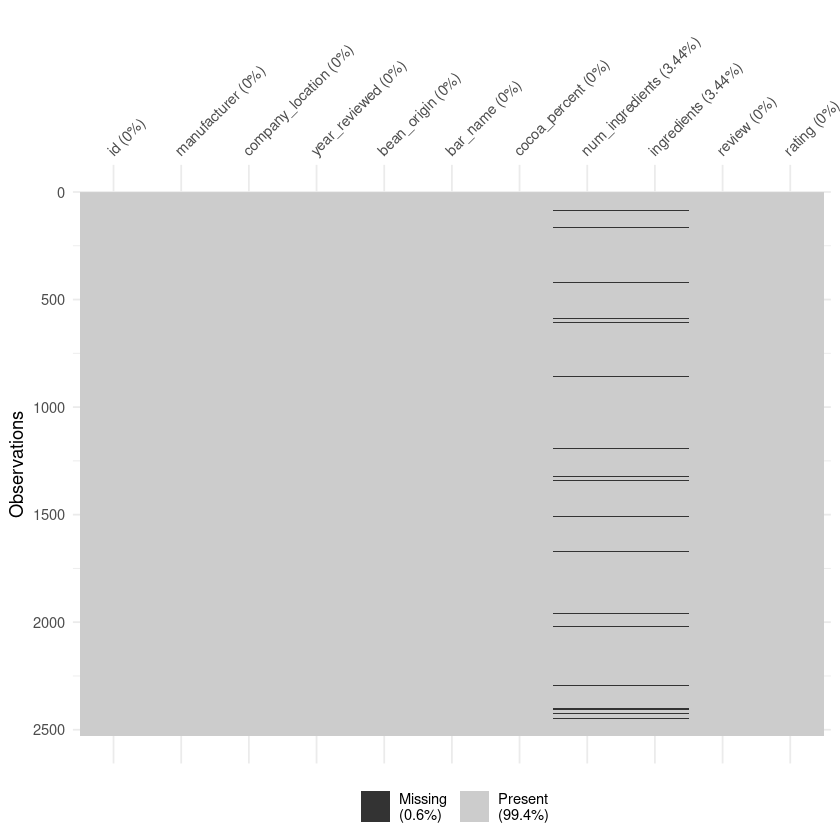

In [66]:
# Checking missing values
paste("There are", sum(is.na(cb)), "missing values")

v <- capture.output(install.packages("naniar"))

suppressPackageStartupMessages(library(naniar))
vis_miss(cb)



There are 174 missing values that are present in the `num_ingredients` and `ingredients`. To fix this we fill the missing values with ones beneath each.

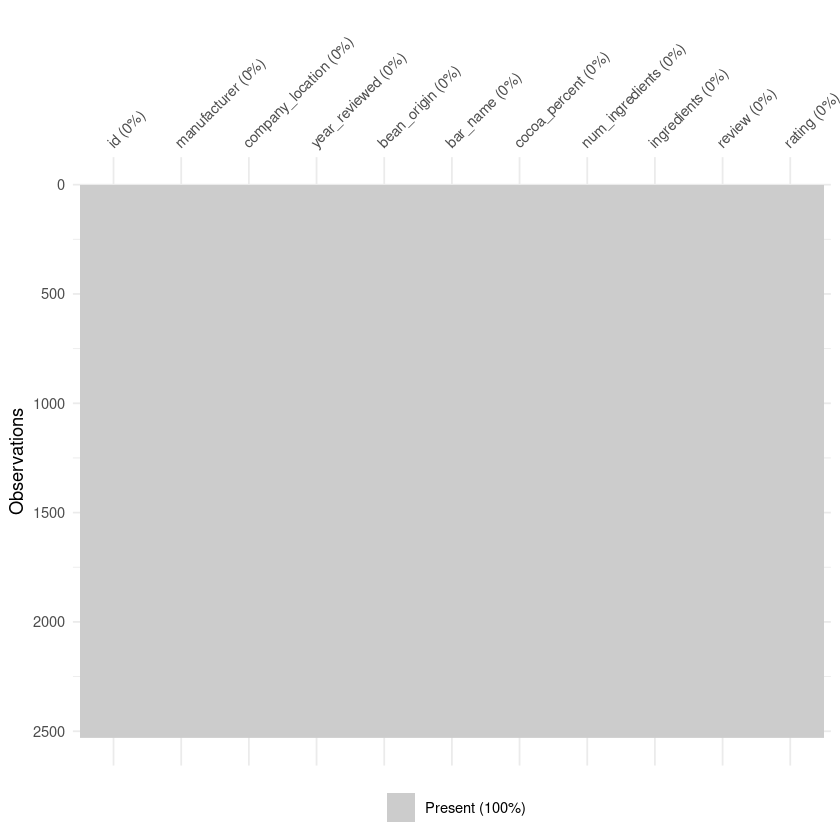

In [67]:
# Filling missing values
cb <- cb %>% fill(num_ingredients, ingredients)

vis_miss(cb)

## Average rating for chocolate bars by country of origin

Here we find the average rating for chocolate bars according to their bean origin. Additionally, data is binned according to the scale of their individual rating to prepare for its visualization.

We can use `group_by` to group the information by the column "num_ingredients". Then we use `summarize` and `mean()` to get the average rating for each group:

In [10]:


# Categorizing data
cb <- cb %>% mutate(rating_cat = case_when(
  rating >= 1 & rating <= 1.9 ~ "Unpleasant",
  rating >= 2 & rating <= 2.9 ~ "Disappointing",
  rating >= 3 & rating <= 3.49 ~ "Recommended",
  rating >= 3.5 & rating <= 3.9 ~ "Highly Recommended",
  rating >= 4 & rating <= 5 ~ "Outstanding"
))

# Average rating by country of origin
rating_origin<- cb %>% group_by(bean_origin) %>%  summarize(avg_rating = mean(rating)) %>% arrange(desc(avg_rating))
head(rating_origin)


bean_origin,avg_rating
<chr>,<dbl>
Tobago,3.625000
China,3.500000
Sao Tome & Principe,3.500000
Solomon Islands,3.450000
Congo,3.318182
Thailand,3.300000


Tobago, China, and Sao Tome and Principe provide the top three most highly rated cocoa beans based on average ratings. We may also plot the above-mentioned table (average rating for chocolate bars by country of origin):

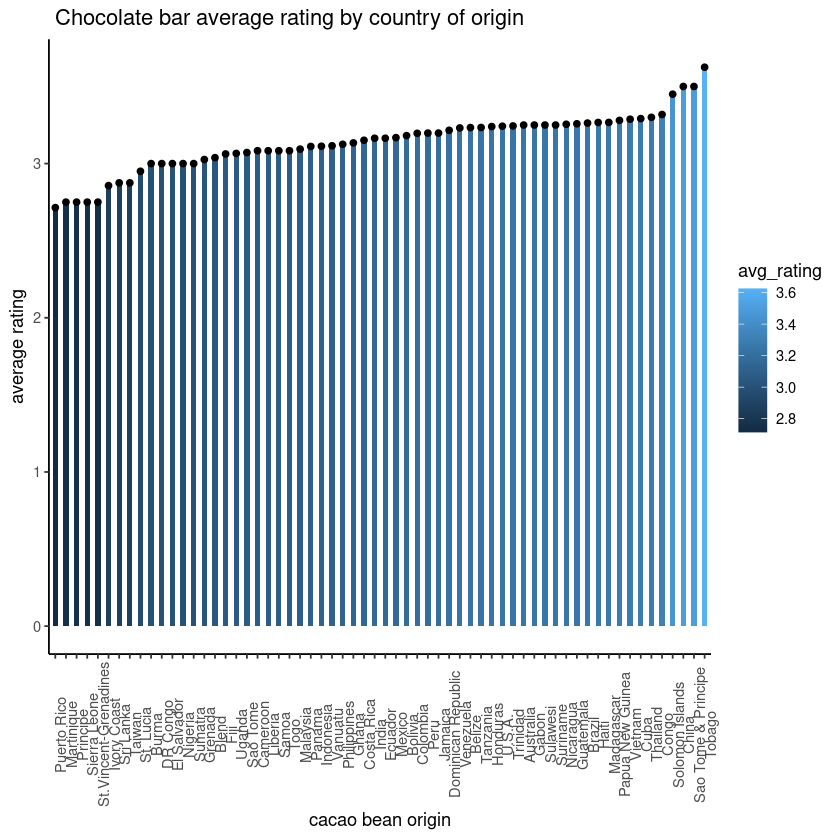

In [56]:
# Visualising average rating by country of origin
ggplot(rating_origin, aes(reorder(bean_origin, avg_rating), avg_rating)) + 
  geom_col(aes(fill = avg_rating), width = 0.5)+ geom_point() + theme_classic() + theme(axis.text.x = element_text(angle = 90)) +
	labs(title = " Chocolate bar average rating by country of origin ") + xlab("cacao bean origin") + ylab("average rating")
	

## Number of bars for chocolate bars by country of origin

We count the number of graded bars and group them by the country of origin of their cocoa beans. This will tell us how important those ratings are.


In [14]:
# Number of bars reviewed by country of origin
bar_origns <- cb %>% group_by(bean_origin) %>% summarize(n = length(bar_name)) %>% arrange(desc(n))
head(bar_origns)



bean_origin,n
<chr>,<int>
Venezuela,253
Peru,244
Dominican Republic,226
Ecuador,219
Madagascar,177
Blend,156


The majority of the rated bars appear to be from Venezuela, Peru, and the Dominican Republic. We may also plot the above-mentioned table (number of bars for chocolate bars by nation of origin):

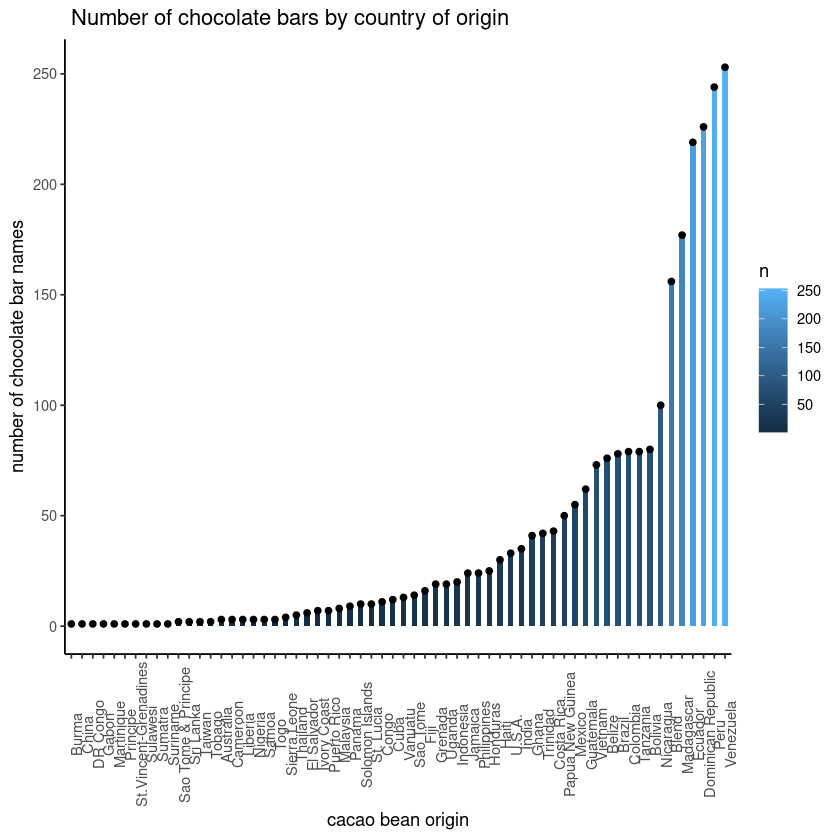

In [60]:
# Number of bars reviewed by country of origin
ggplot(bar_origns, aes(reorder(bean_origin,n),n)) +  geom_col(aes(fill = n), width = 0.5)+ 
  geom_point() + theme_classic() + theme(axis.text.x = element_text(angle = 90)) +
	labs(title = " Number of chocolate bars by country of origin ") + xlab("cacao bean origin") + ylab("number of chocolate bar names")


## Is the cacao bean's origin an indicator of quality?

In [23]:
# Number of bars and their average ratings arranged in descending order and grouped by cacao's bean origin
bean_in<- cb %>% group_by(bean_origin) %>%  summarize(avg_rating = mean(rating),n = length(bar_name), avg_percent = mean(cocoa_percent)) %>% arrange(desc(n),desc(avg_rating))
head(bean_in, n = 10)

bean_in1<- cb %>% group_by(bean_origin) %>%  summarize(avg_rating = mean(rating),n = length(bar_name), avg_percent = mean(cocoa_percent)) %>% arrange(desc(avg_rating), desc(n))
head(bean_in1, n= 10)

bean_origin,avg_rating,n,avg_percent
<chr>,<dbl>,<int>,<dbl>
Venezuela,3.231225,253,72.01779
Peru,3.197746,244,70.95082
Dominican Republic,3.215708,226,71.52655
Ecuador,3.164384,219,73.27626
Madagascar,3.266949,177,71.23729
Blend,3.038462,156,71.92628
Nicaragua,3.255000,100,71.42000
Bolivia,3.181250,80,71.58750
Tanzania,3.234177,79,72.26582


bean_origin,avg_rating,n,avg_percent
<chr>,<dbl>,<int>,<dbl>
Tobago,3.625000,2,65.00000
Sao Tome & Principe,3.500000,2,72.50000
China,3.500000,1,72.00000
Solomon Islands,3.450000,10,71.80000
Congo,3.318182,11,70.45455
Thailand,3.300000,5,70.00000
Cuba,3.291667,12,74.33333
Vietnam,3.287671,73,72.35616
Papua New Guinea,3.280000,50,70.68000


According to the summary, highly recommended cacao beans have a tiny number of distinct bars analyzed, so their ratings may not be regarded important. Meanwhile, suggested cacao beans have a sufficient number of evaluated bars to back up their ratings, thus it is reasonable to conclude cacao bean origin is an indicator of its quality. This demonstrates that Madagascar produces high-quality cocoa beans.

## Relationship between cocoa content and its ratings
Here we find out how cocoa content relate to rating. Additionally the average content for bars with ratings above 3.5 are estimated.

[1] -0.1466896

`geom_smooth()` using formula 'y ~ x'



avg_rating
<dbl>
70.95


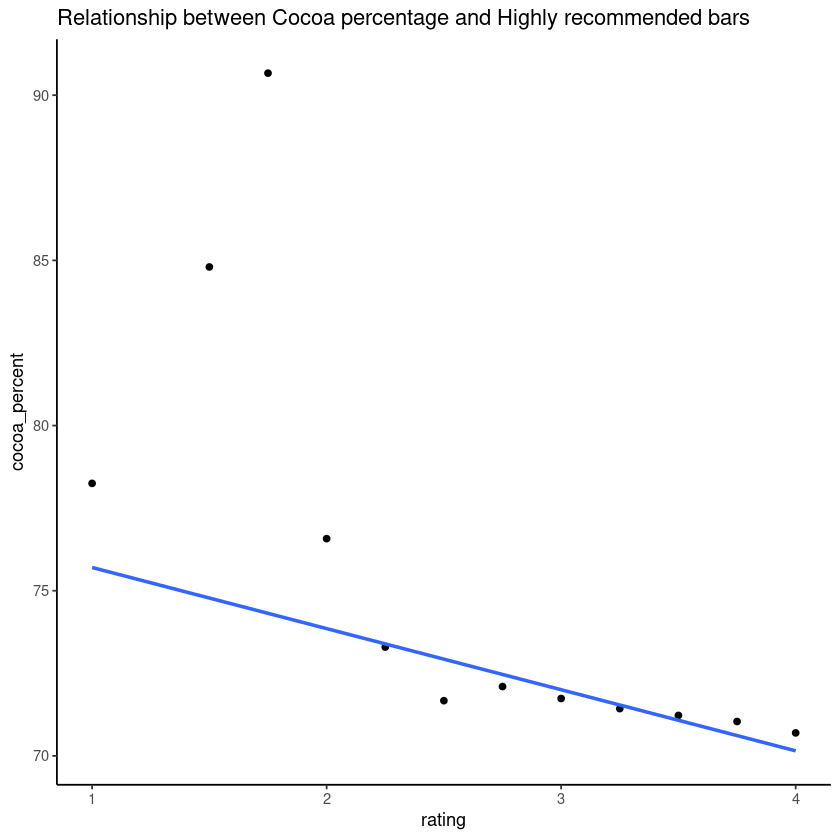

In [50]:
# Correlation between rating and cocoa percentage present in chocolate bar
cor(cb$rating, cb$cocoa_percent)

# Plot of relationship between rating and cocoa percentage present in chocolate bar
ggplot(cb, aes(rating, cocoa_percent)) +
  stat_summary(fun = mean, geom = "point") + stat_smooth(se = FALSE, method = "lm") + labs(title = "Relationship between Cocoa percentage and Highly recommended bars") + theme_classic()

# Average cocoa content for bars with higher ratings (above 3.5)
cb %>% filter(rating > 3.5) %>% summarize(avg_rating = round(mean(cocoa_percent),2))

There is a negative relationship between cocoa content and rating. Meaning as cocoa percentage used in a chocolate bar is increased the lower their ratings.

## Ratings of Lecithin and Non-Lecithin consumers
Research indicated that some consumers want to avoid bars with lecithin. Here, we find out how true this claim is by comparing the mean ratings of bars with and without lecithin.

In [62]:
# Indicating chocolate bars with lecithin as an ingredient
cb <- cb %>% mutate(lec = ifelse(str_detect(ingredients, "L")== TRUE, TRUE, FALSE))

# Summary of bars with and without lecithin
cb %>% group_by(lec) %>% summarise(avg = mean(rating))




lec,avg
<lgl>,<dbl>
FALSE,3.211386
TRUE,3.136765


This indicated that chocolate bars without lecithin as an ingredient had a slightly greater average rating when compared with chocolate bars with it. There is the need to test whether the difference is significant enough to support claim that the average rating of chocolate bars without lecithin is greater than chocolate bars with lecithin.

In [63]:
# Testing the significant difference between bars with and without lecithin
t.test(rating ~lec, data = cb)


	Welch Two Sample t-test

data:  rating by lec
t = 3.1127, df = 714.03, p-value = 0.001928
alternative hypothesis: true difference in means between group FALSE and group TRUE is not equal to 0
95 percent confidence interval:
 0.02755432 0.12168854
sample estimates:
mean in group FALSE  mean in group TRUE 
           3.211386            3.136765 


The p-value  after the test is lesser than the significance level(0.05), therefore average rating of chocolate bars without lecithin is greater than chocolate bars with lecithin.

## Summary
- The aggregation of average ratings indicated that Tobago, China and Sao Tome & Principe produce the top three most highly rated cacao beans but had no substantial evidence to back since they have smaller sample sizes


- Venezuela, Peru and the  Dominican Republic were the countries with the largest number of chocolate bars that used their cacao beans with values 253, 244 and 226 respectively. Meaning, most companies usually use cacao beans from these countries.


- There is a negative relationship between cocoa content and rating. This means as cocoa percentage used in a chocolate bar is increased the lower their average ratings. Additionally, on average, cocoa percent for bars with higher ratings above 3.5 is 71%.


- With a 95% confidence interval, chocolate bars without lecithin as an ingredient has a greater average rating when compared with chocolate bars with it. 


- The overall best and highly rated cacao bean come from Madagascar with an average rating of 3.27. This asserted the fact that cacao bean's origin is an indicator of quality.